In [6]:
import sys
sys.path

['/home/zmobille3/SpikeCodingProject/0224',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/home/zmobille3/.local/lib/python3.10/site-packages',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages']

In [7]:
sys.path.append('/home/zmobille3/anaconda/envs/spike_env/lib/python310.zip')
sys.path.append('/home/zmobille3/anaconda/envs/spike_env/lib/python3.10')
sys.path.append('/home/zmobille3/anaconda/envs/spike_env/lib/python3.10/site-packages')
sys.path.append('/home/zmobille3/anaconda/envs/spike_env/lib/python3.10/lib-dynload')

In [8]:
sys.path

['/home/zmobille3/SpikeCodingProject/0224',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/home/zmobille3/.local/lib/python3.10/site-packages',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/home/zmobille3/anaconda/envs/spike_env/lib/python310.zip',
 '/home/zmobille3/anaconda/envs/spike_env/lib/python3.10',
 '/home/zmobille3/anaconda/envs/spike_env/lib/python3.10/site-packages',
 '/home/zmobille3/anaconda/envs/spike_env/lib/python3.10/lib-dynload']

In [13]:
import numpy as np
import matplotlib.pyplot as plt

(1000, 1)


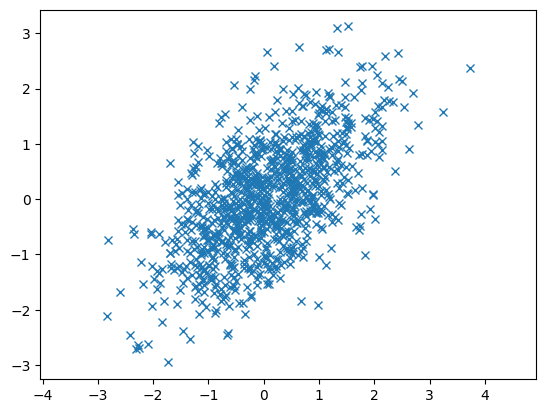

In [18]:

N = 1000
rho = 0.6
mean = [0, 0]
cov = [[1, rho], [rho, 1]]
x, y = np.random.multivariate_normal(mean, cov, N).T
x = np.reshape(x,(N,1))
print(np.shape(x))

plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()


In [19]:
from sklearn.feature_selection import f_regression, mutual_info_regression
mi = mutual_info_regression(x, y)
print(mi)

[0.21694862]


In [20]:
Nvec = np.arange(100,1100,100)
MIvec = np.zeros(len(Nvec))
i=0
for N in Nvec:
    x, y = np.random.multivariate_normal(mean, cov, N).T
    x = np.reshape(x,(N,1))
    mi = mutual_info_regression(x, y)
    MIvec[i] = mi
    i+=1

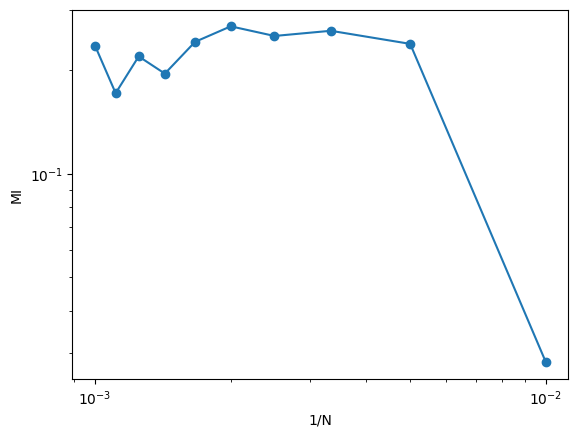

In [21]:
plt.plot(1/Nvec,MIvec,marker='o')
plt.ylabel('MI')
plt.xlabel('1/N')
plt.xscale('log')
plt.yscale('log')

In [22]:
X, Y = np.random.multivariate_normal(mean, cov, (1000,100)).T
print(np.shape(X))
print(np.shape(Y))
print(np.shape(X[0,:]))
# plt.plot(X[:,0],Y[:,0],marker='o',linestyle='')
# print(np.shape(X[0,:]))

(100, 1000)
(100, 1000)
(1000,)


In [23]:
Nvec = np.arange(100,1100,100)
MIvars = np.zeros(len(Nvec))
i=0
for N in Nvec:
    X, Y = np.random.multivariate_normal(mean, cov, (N,100)).T
    MIvec = []
    for j in range(100):
        x = X[j,:]
        y = Y[j,:]
        x = np.reshape(x,(N,1))
        mi = mutual_info_regression(x, y)
        MIvec.append(mi)
    MIvars[i] = np.std(MIvec)**2
    i+=1

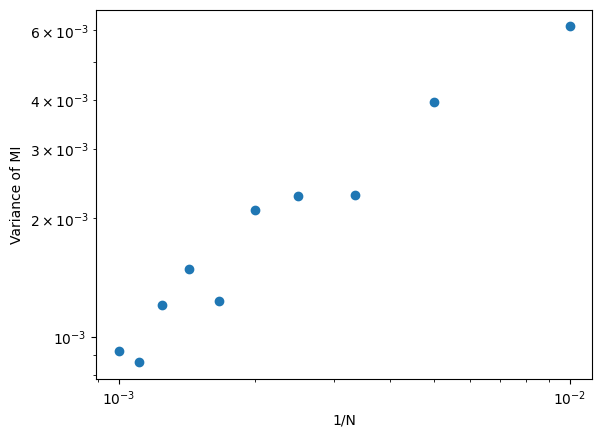

In [24]:
plt.plot(1/Nvec,MIvars,marker='o',linestyle='')
plt.ylabel('Variance of MI')
plt.xlabel('1/N')
plt.xscale('log')
plt.yscale('log')

$\sigma_\text{KSG}^2(N)=\frac{B}{N}$

In [99]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))
list(split([1,2,3,4,5,6,7,8,9], 2))

[[1, 2, 3, 4, 5], [6, 7, 8, 9]]

In [84]:
N = 100
rho = 0.6
mean = [0, 0]
cov = [[1, rho], [rho, 1]]
x, y = np.random.multivariate_normal(mean, cov, N).T
# print('x = '+str(x))
# print('y = '+str(y))

n = 25
subSize = int(N/n)
xsub = list(split(x,subSize))
ysub = list(split(y,subSize))
# print('len(xsub) = '+str(len(xsub)))
# print('ysub = '+str(ysub))
for i in range(len(xsub)):
#     print(xsub[i])
    x = np.reshape(xsub[i],(len(xsub[i]),1))
    y = ysub[i]
    mi = mutual_info_regression(x, y, n_neighbors=1)

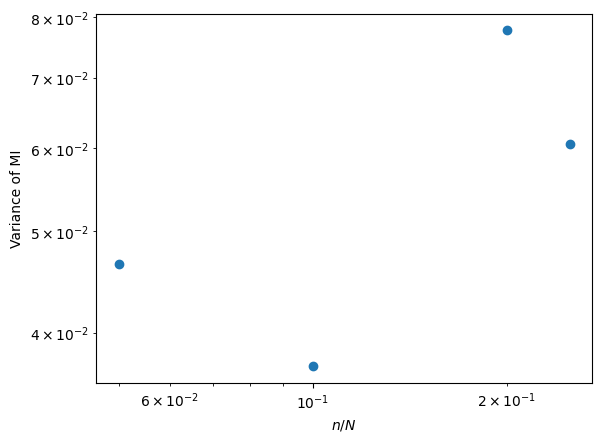

In [92]:
N = 100
rho = 0.6
mean = [0, 0]
cov = [[1, rho], [rho, 1]]
x, y = np.random.multivariate_normal(mean, cov, N).T
# print('x = '+str(x))
# print('y = '+str(y))

nVec = np.array([5,10,20,25])
miVars = []
for n in nVec:
    mis = []
    subSize = int(N/n)
    xsub = list(split(x,subSize))
    ysub = list(split(y,subSize))
    for i in range(len(xsub)):
        xs = np.reshape(xsub[i],(len(xsub[i]),1))
        ys = ysub[i]
        mi = mutual_info_regression(xs, ys, n_neighbors=1)
        mis.append(mi)
    miVar = np.std(mis)**2
    miVars.append(miVar)
plt.plot(np.divide((nVec),N),miVars,linestyle='',marker='o')
plt.ylabel('Variance of MI')
plt.xlabel('$n/N$')
plt.xscale('log')
plt.yscale('log')

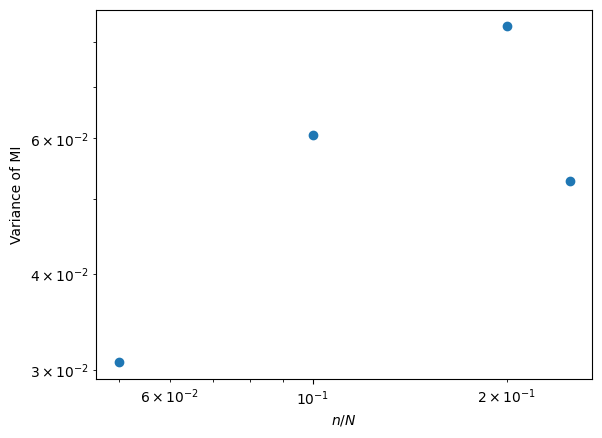

In [100]:
N = 100
rho = 0.6
mean = [0, 0]
cov = [[1, rho], [rho, 1]]
x, y = np.random.multivariate_normal(mean, cov, N).T
# print('x = '+str(x))
# print('y = '+str(y))

nVec = np.array([5,10,20,25])
miVars = []
for n in nVec:
    mis = []
    subSize = int(N/n)
    xsub = list(split(x,n))
    ysub = list(split(y,n))
    for i in range(len(xsub)):
        xs = np.reshape(xsub[i],(len(xsub[i]),1))
        ys = ysub[i]
        mi = mutual_info_regression(xs, ys, n_neighbors=1)
        mis.append(mi)
    miVar = np.std(mis)**2
    miVars.append(miVar)
plt.plot(np.divide((nVec),N),miVars,linestyle='',marker='o')
plt.ylabel('Variance of MI')
plt.xlabel('$n/N$')
plt.xscale('log')
plt.yscale('log')

splitting data into non-overlapping subsets of size 200
splitting data into non-overlapping subsets of size 100
splitting data into non-overlapping subsets of size 83
splitting data into non-overlapping subsets of size 66
splitting data into non-overlapping subsets of size 55
splitting data into non-overlapping subsets of size 50
splitting data into non-overlapping subsets of size 40
[0.011778979577577071, 0.017827773020099486, 0.025232691898376708, 0.016781924591115972, 0.035351219760536665, 0.023264312434091165, 0.035760415691422735]


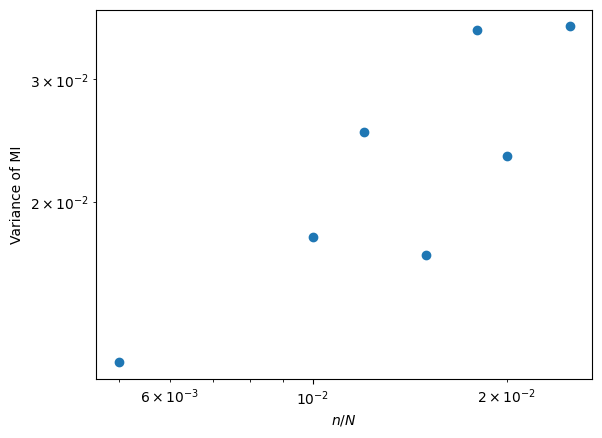

In [101]:
# partition sample of size N=1000 into n non-overlapping subsets. Estimate variance
# of KSG by computing MI for each subsample.

N = 10**3
rho = 0.6
mean = [0, 0]
cov = [[1, rho], [rho, 1]]
x, y = np.random.multivariate_normal(mean, cov, N).T
# x = np.reshape(x,(N,1))
# print(np.shape(x))

nVec = [5,10,12,15,18,20,25] # number of non-overlapping subsets
miVars = []
# nVec = [50,100]
for n in nVec:
    mis = []
#     print(int(N/n))
    subSize = int(N/n)
    print('splitting data into non-overlapping subsets of size '+str(subSize))
    xsub = list(split(x,n))
#     print(len(xsub))
#     xsub = np.reshape(xsub,(subSize,1))
    ysub = list(split(y,n))
    for i in range(len(xsub)):
        xs = xsub[i]
#         print(len(x))
        xs = np.reshape(xs,(len(xs),1))
        ys = ysub[i]
#         print(len(x))
#         print(len(y))
        mi = mutual_info_regression(xs, ys, n_neighbors=1)
        mis.append(mi)
#     mi = mutual_info_regression(xsub, ysub)
    miVar = np.std(mis)**2
    miVars.append(miVar)
#     print(np.std(mis)**2)
plt.plot(np.divide((nVec),N),miVars,linestyle='',marker='o')
plt.ylabel('Variance of MI')
plt.xlabel('$n/N$')
plt.xscale('log')
plt.yscale('log')
print(miVars)

Maximum-likelihood solution for B:
$B_\text{ML}=\frac{\sum_i\frac{n_i-1}{n_i}N\sigma_\text{KSG}^2}{\sum_i(n_i-1)}$

0.007015036726201455


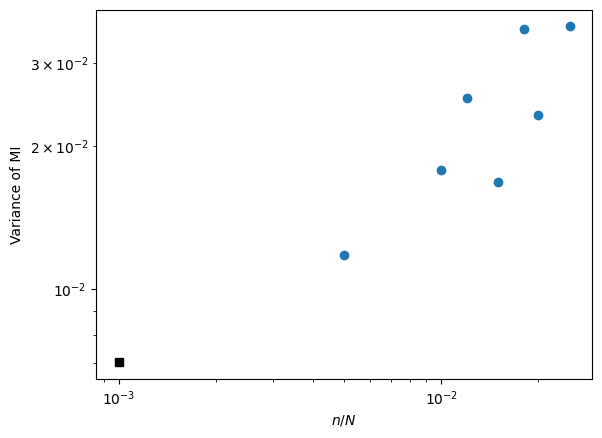

In [106]:
sigma_KSG = 0.
j = 0
for ni in nVec:
    add = miVars[j]/ni
    sigma_KSG += add
print(sigma_KSG)
plt.plot(0.001,sigma_KSG,marker='s',color='black')
plt.plot(np.divide((nVec),N),miVars,linestyle='',marker='o')
plt.ylabel('Variance of MI')
plt.xlabel('$n/N$')
plt.xscale('log')
plt.yscale('log')